# Task 1

##  I.convert img to grayscale and resize
Apply an OpenCV libary by :
```bash
pip install -r requirements.txt
```

<b>OpenCV-python</b> & <b> matplotlib</b> in requirements.txt 

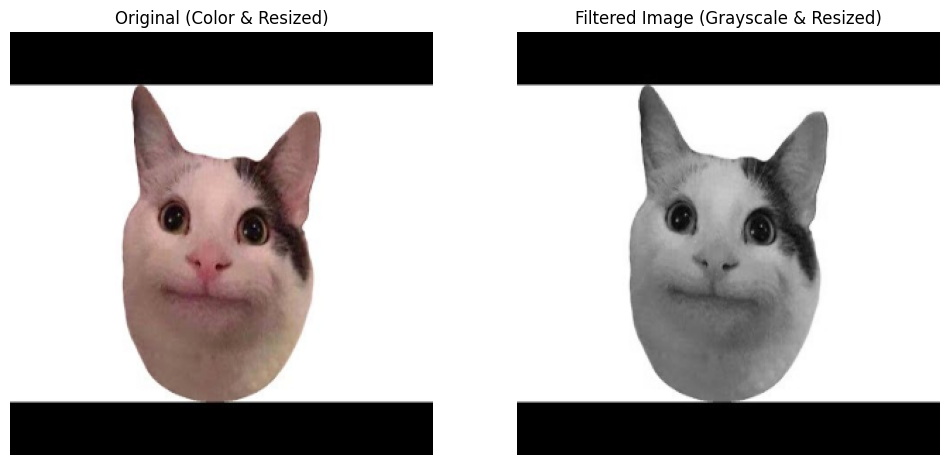

True

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

# Create the "outputs" folder if it doesn't exist
output_folder = 'outputs'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Load the image in color
image = cv2.imread('img/smile_cat.png')

# Convert the original image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define the new width and height for resizing
new_width = 300  # Set your desired width
new_height = 300  # Set your desired height

# Resize the original color image to the specified width and height
resized_color = cv2.resize(image, (new_width, new_height))

# Resize the grayscale image to the specified width and height
resized_gray = cv2.resize(gray_image, (new_width, new_height))

# Display the original (color & resized) and the filtered (grayscale & resized) images side by side
plt.figure(figsize=(12, 6))

# Original (Color & Resized)
plt.subplot(1, 2, 1)
plt.title('Original (Color & Resized)')
plt.imshow(cv2.cvtColor(resized_color, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Filtered Image (Grayscale & Resized)
plt.subplot(1, 2, 2)
plt.title('Filtered Image (Grayscale & Resized)')
plt.imshow(resized_gray, cmap='gray')
plt.axis('off')

plt.show()
# it was so smooth and east to do it 

# Save the filtered image to the outputs folder
cv2.imwrite(os.path.join(output_folder, 'filtered_image.jpg'), resized_gray) 

## Task 2 : Guideline for the Project
### Objectives
- **Filtering:**  
  Apply two types of blurring and two types of sharpening functions.
  
- **Display:**  
  Display the original image alongside the filtered images for side-by-side comparison.

- **Output:**  
  Save all processed images in the `outputs` folder.


- **File Structure:**  
  The main image should be placed in the `img` folder (e.g., `img/smile_cat.png`).

- **Error Handling:**  
  Check if the image loads correctly before processing. Raise an error or provide a message if the image is not found.

### Implementation Steps
1. **Setup:**  
   - Create an `outputs` folder if it doesn't exist.
   - Load the image and convert it for display (e.g., from BGR to RGB).

2. **Experiment 1 - Built-in Functions:**  
   - Use `cv2.GaussianBlur` for blurring.
   - Use a technique like `cv2.addWeighted` in combination with a blurred image to achieve sharpening.

3. **Experiment 2 - Custom Kernels:**  
   - Define custom kernels for both sharpening and blurring.
   - Apply these kernels using `cv2.filter2D`.

4. **Visualization:**  
   - Use Matplotlib to display the original image and the filtered images side by side.
   - Ensure the images are saved in the `outputs` folder.

### Deliverables
- A Jupyter Notebook with clear markdown descriptions.
- Code cells performing the necessary image processing.
- Saved output images in the `outputs` folder for verification.

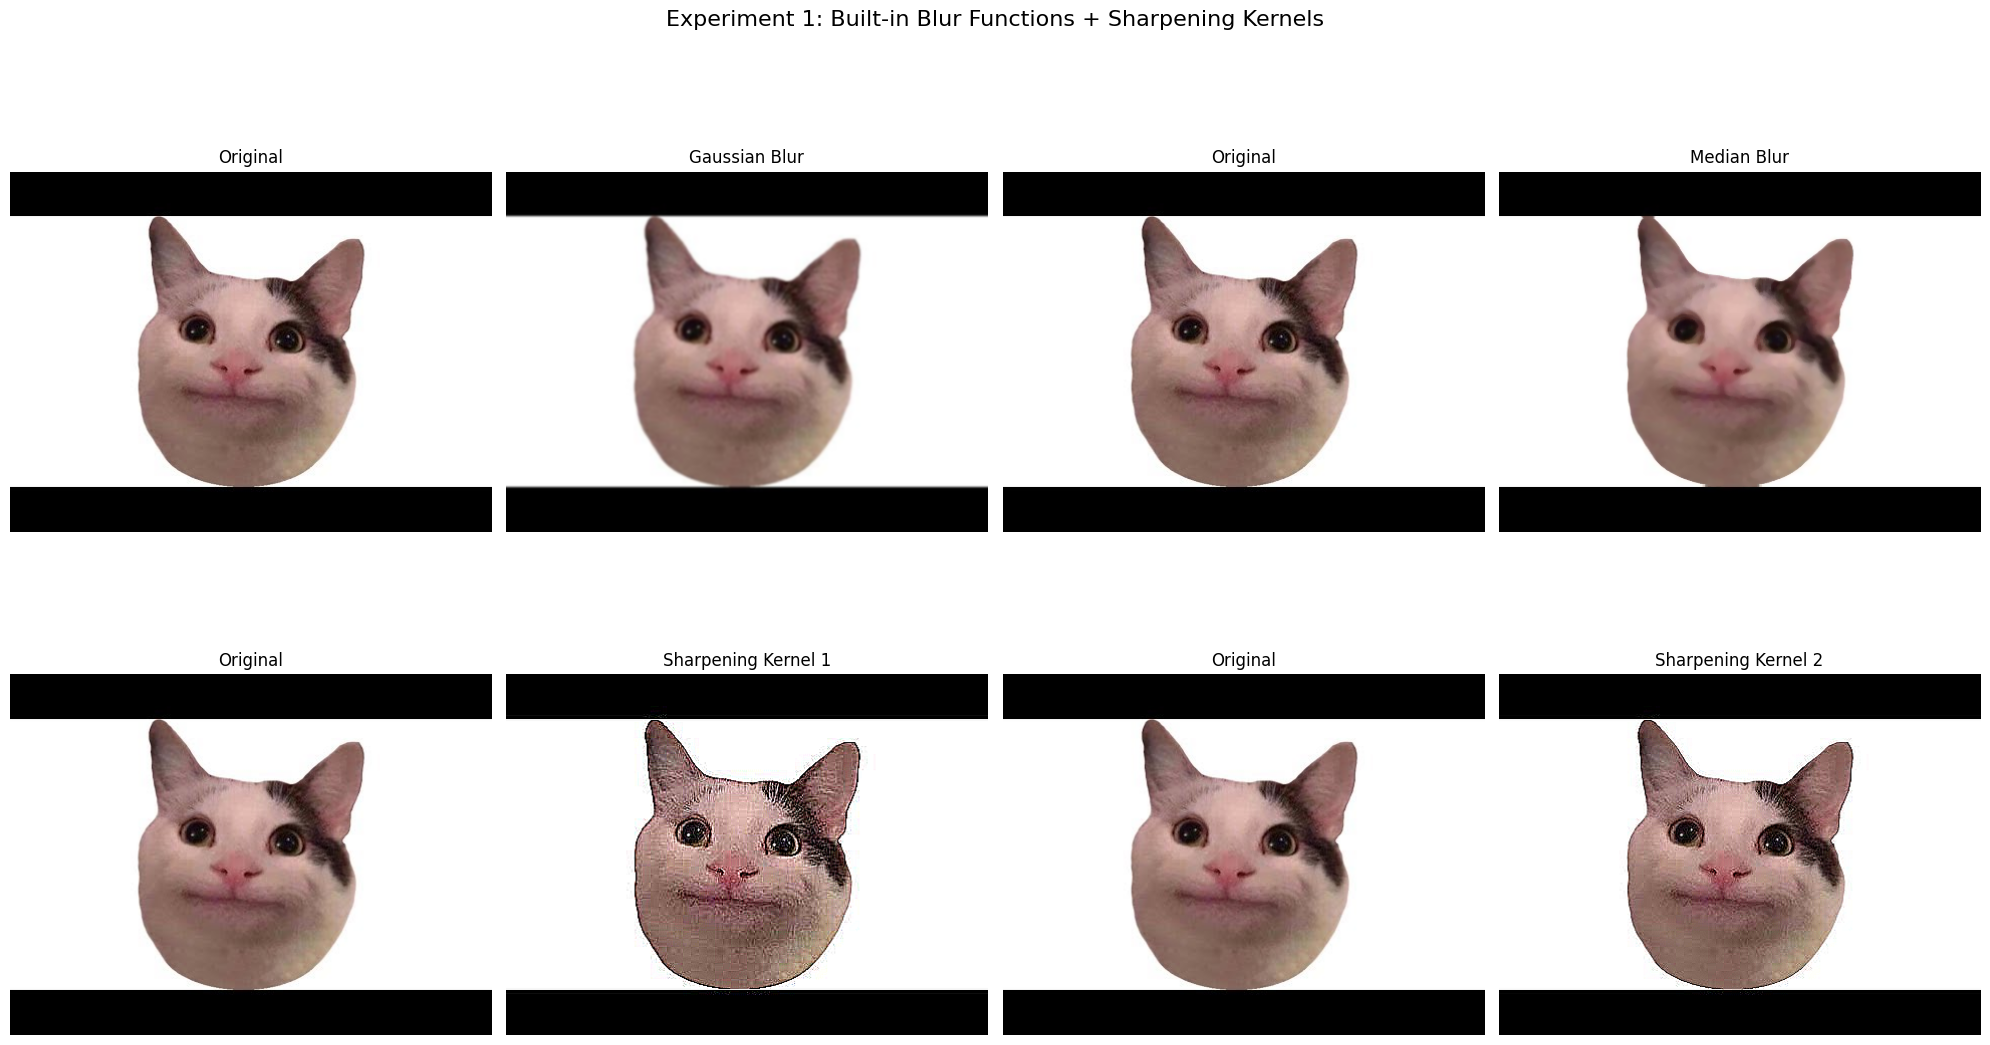

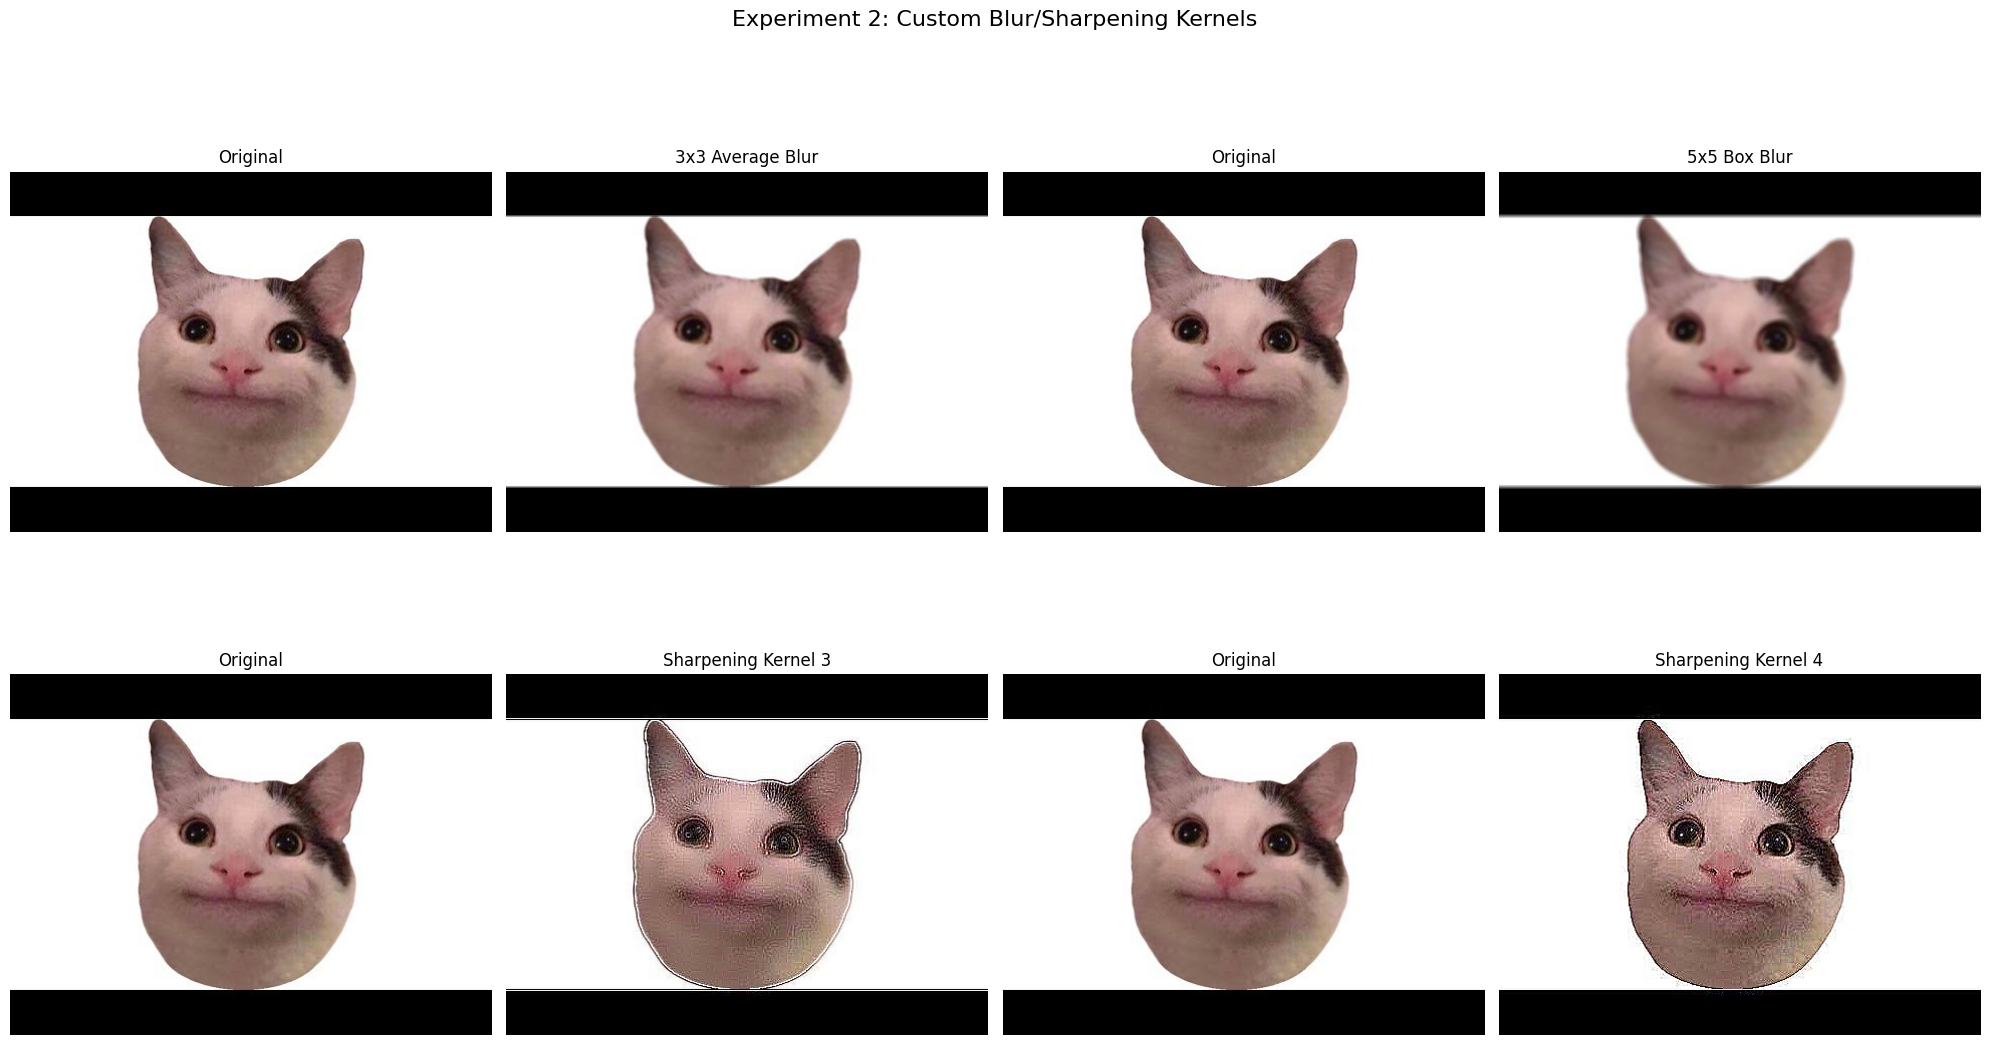

All results saved to the 'outputs' folder!


In [1]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Create the "outputs" folder if it doesn't exist
output_folder = 'outputs'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Load the image in BGR format (OpenCV default)
image_bgr = cv2.imread('img/smile_cat.png')

# Convert to RGB for display purposes
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# =====================================================================
# Experiment 1: Built-in Functions for Blurring + Sharpening Kernels
# =====================================================================

# Apply Blurring (2 built-in methods)
gaussian_blur_bgr = cv2.GaussianBlur(image_bgr, (5, 5), 0)  # Gaussian blur
median_blur_bgr = cv2.medianBlur(image_bgr, 5)               # Median blur

# Apply Sharpening (2 custom kernels using filter2D)
sharpen_kernel1 = np.array([[-1, -1, -1],
                            [-1, 9, -1],
                            [-1, -1, -1]])  # Strong sharpening

sharpen_kernel2 = np.array([[0, -1, 0],
                            [-1, 5, -1],
                            [0, -1, 0]])    # Moderate sharpening

sharpened1_bgr = cv2.filter2D(image_bgr, -1, sharpen_kernel1)
sharpened2_bgr = cv2.filter2D(image_bgr, -1, sharpen_kernel2)

# Convert results to RGB for display
gaussian_blur_rgb = cv2.cvtColor(gaussian_blur_bgr, cv2.COLOR_BGR2RGB)
median_blur_rgb = cv2.cvtColor(median_blur_bgr, cv2.COLOR_BGR2RGB)
sharpened1_rgb = cv2.cvtColor(sharpened1_bgr, cv2.COLOR_BGR2RGB)
sharpened2_rgb = cv2.cvtColor(sharpened2_bgr, cv2.COLOR_BGR2RGB)
# Plot results for Experiment 1
plt.figure(figsize=(20, 12))
plt.suptitle("Experiment 1: Built-in Blur Functions + Sharpening Kernels", fontsize=16)

# Blurring Results
plt.subplot(2, 4, 1)
plt.title("Original")
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(2, 4, 2)
plt.title("Gaussian Blur")
plt.imshow(gaussian_blur_rgb)
plt.axis('off')

plt.subplot(2, 4, 3)
plt.title("Original")
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(2, 4, 4)
plt.title("Median Blur")
plt.imshow(median_blur_rgb)
plt.axis('off')

# Sharpening Results
plt.subplot(2, 4, 5)
plt.title("Original")
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(2, 4, 6)
plt.title("Sharpening Kernel 1")
plt.imshow(sharpened1_rgb)
plt.axis('off')

plt.subplot(2, 4, 7)
plt.title("Original")
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(2, 4, 8)
plt.title("Sharpening Kernel 2")
plt.imshow(sharpened2_rgb)
plt.axis('off')

plt.tight_layout()
plt.show()

# Save Experiment 1 results
cv2.imwrite(os.path.join(output_folder, 'exp1_gaussian_blur.png'), gaussian_blur_bgr)
cv2.imwrite(os.path.join(output_folder, 'exp1_median_blur.png'), median_blur_bgr)
cv2.imwrite(os.path.join(output_folder, 'exp1_sharpening1.png'), sharpened1_bgr)
cv2.imwrite(os.path.join(output_folder, 'exp1_sharpening2.png'), sharpened2_bgr)

# =====================================================================
# Experiment 2: Custom Kernels for Blurring + Sharpening
# =====================================================================

# Define Blurring Kernels (2 custom matrices)
kernel_blur1 = np.ones((3, 3), np.float32) / 9.0  # 3x3 Average blur
kernel_blur2 = np.ones((5, 5), np.float32) / 25.0 # 5x5 Box blur

# Apply Blurring using custom kernels
blur1_bgr = cv2.filter2D(image_bgr, -1, kernel_blur1)
blur2_bgr = cv2.filter2D(image_bgr, -1, kernel_blur2)

# Define Sharpening Kernels (2 custom matrices)
sharpen_kernel3 = np.array([[1, 1, 1],
                            [1, -7, 1],
                            [1, 1, 1]])  # Edge-enhanced sharpening

sharpen_kernel4 = np.array([[0, -2, 0],
                            [-2, 9, -2],
                            [0, -2, 0]]) # Stronger sharpening

# Apply Sharpening
sharpened3_bgr = cv2.filter2D(image_bgr, -1, sharpen_kernel3)
sharpened4_bgr = cv2.filter2D(image_bgr, -1, sharpen_kernel4)

# Convert results to RGB for display
blur1_rgb = cv2.cvtColor(blur1_bgr, cv2.COLOR_BGR2RGB)
blur2_rgb = cv2.cvtColor(blur2_bgr, cv2.COLOR_BGR2RGB)
sharpened3_rgb = cv2.cvtColor(sharpened3_bgr, cv2.COLOR_BGR2RGB)
sharpened4_rgb = cv2.cvtColor(sharpened4_bgr, cv2.COLOR_BGR2RGB)

# Plot results for Experiment 2
plt.figure(figsize=(20, 12))
plt.suptitle("Experiment 2: Custom Blur/Sharpening Kernels", fontsize=16)

# Blurring Results
plt.subplot(2, 4, 1)
plt.title("Original")
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(2, 4, 2)
plt.title("3x3 Average Blur")
plt.imshow(blur1_rgb)
plt.axis('off')

plt.subplot(2, 4, 3)
plt.title("Original")
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(2, 4, 4)
plt.title("5x5 Box Blur")
plt.imshow(blur2_rgb)
plt.axis('off')

# Sharpening Results
plt.subplot(2, 4, 5)
plt.title("Original")
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(2, 4, 6)
plt.title("Sharpening Kernel 3")
plt.imshow(sharpened3_rgb)
plt.axis('off')

plt.subplot(2, 4, 7)
plt.title("Original")
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(2, 4, 8)
plt.title("Sharpening Kernel 4")
plt.imshow(sharpened4_rgb)
plt.axis('off')

plt.tight_layout()
plt.show()

# Save Experiment 2 results
cv2.imwrite(os.path.join(output_folder, 'exp2_avg_blur.png'), blur1_bgr)
cv2.imwrite(os.path.join(output_folder, 'exp2_box_blur.png'), blur2_bgr)
cv2.imwrite(os.path.join(output_folder, 'exp2_sharpening3.png'), sharpened3_bgr)
cv2.imwrite(os.path.join(output_folder, 'exp2_sharpening4.png'), sharpened4_bgr)

print("All results saved to the 'outputs' folder!")